In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
%matplotlib inline
sns.set(style='whitegrid')

In [29]:
csv_file_path = './Credit_Score.csv'
# csv_file_path = '/kaggle/input/fds-datsets/Data/Credit_Score.csv'
df = pd.read_csv(csv_file_path)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [30]:
df.shape

(100000, 28)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [32]:
df = df.drop(columns = ['ID', 'Customer_ID', 'Name', 'SSN'])
print(df.columns)
df.head()

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [33]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [34]:
df.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,8.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [35]:
for col_name in df.columns:
    print('column name : ',col_name)
    print(df[col_name].value_counts())
    print('='*50)

column name :  Month
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: Month, dtype: int64
column name :  Age
38.0    3070
28.0    3045
31.0    3037
26.0    3025
32.0    2969
36.0    2953
25.0    2952
27.0    2951
35.0    2940
39.0    2927
34.0    2922
44.0    2902
22.0    2890
19.0    2875
41.0    2865
20.0    2833
37.0    2832
29.0    2823
43.0    2809
30.0    2807
21.0    2792
24.0    2789
23.0    2719
45.0    2712
40.0    2695
42.0    2643
33.0    2623
18.0    2427
46.0    1670
15.0    1615
17.0    1551
16.0    1505
49.0    1419
48.0    1416
55.0    1395
53.0    1394
52.0    1388
54.0    1342
51.0    1332
50.0    1305
47.0    1265
14.0    1197
56.0     379
Name: Age, dtype: int64
column name :  Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           

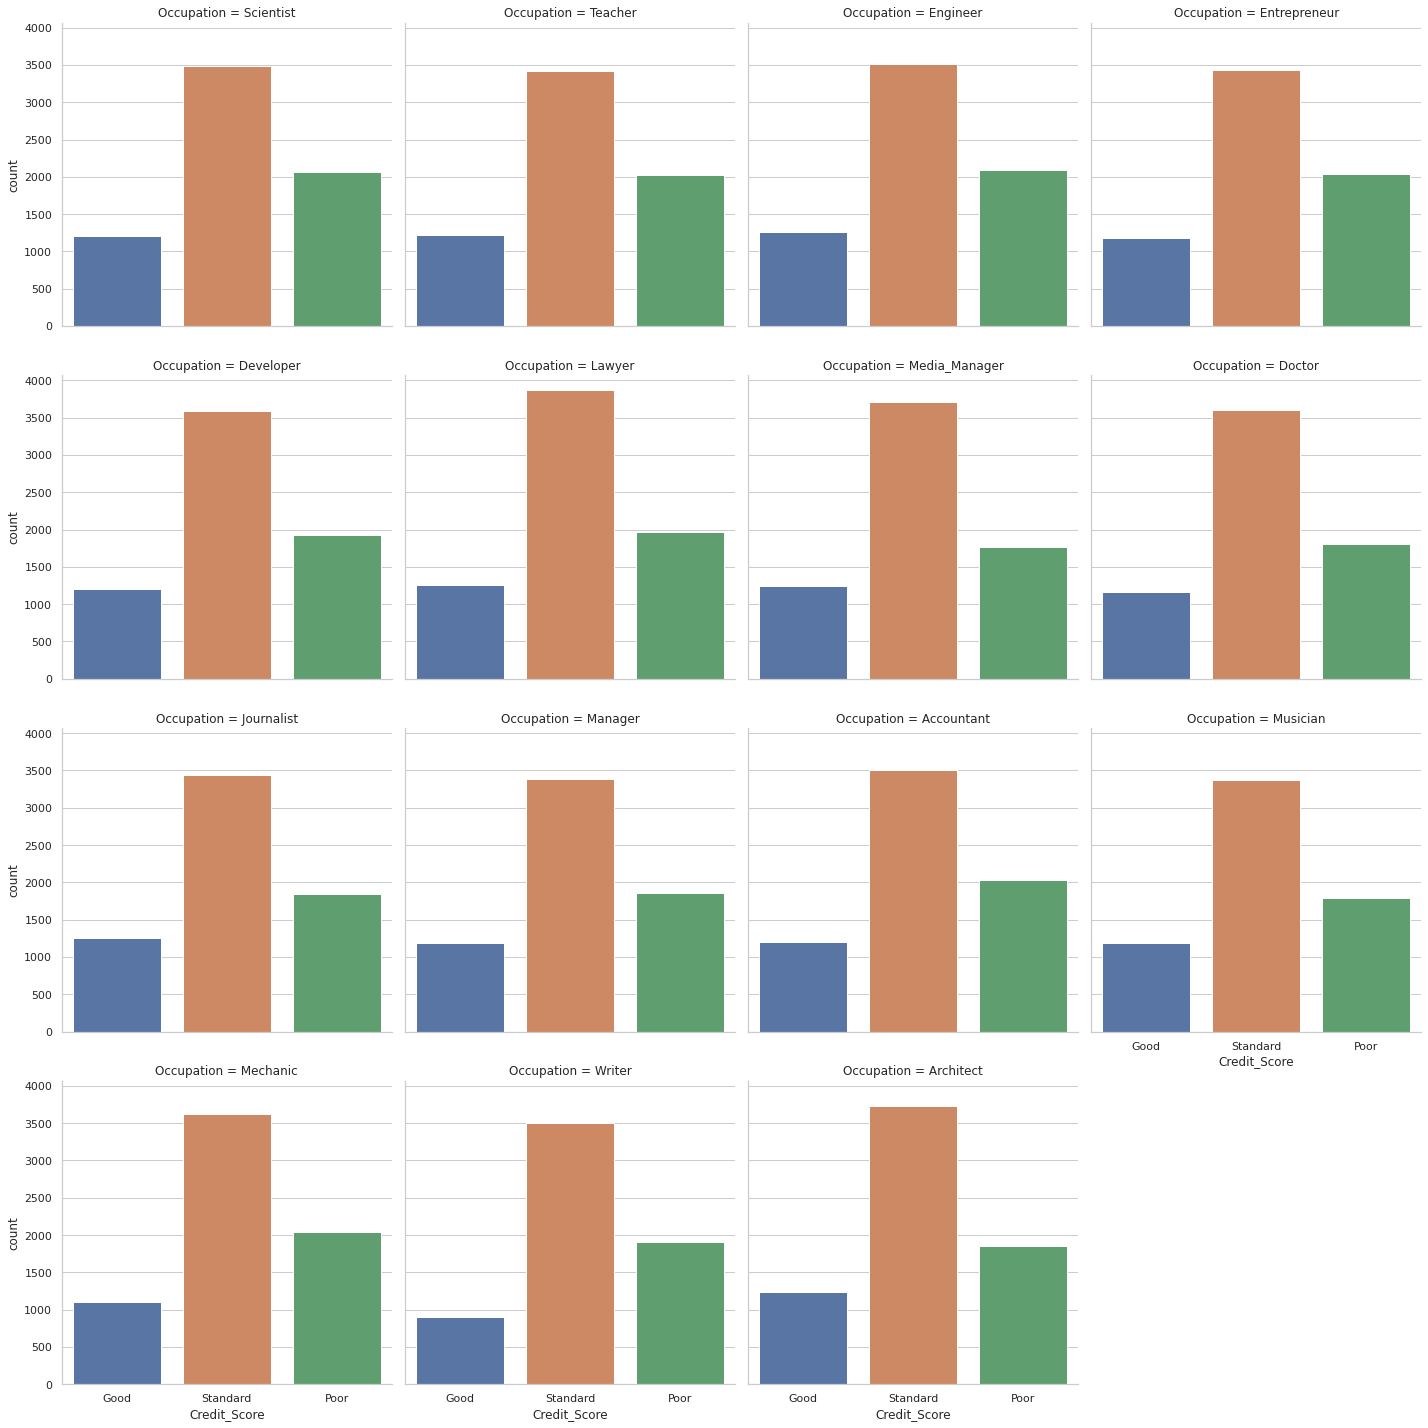

In [36]:
sns.catplot(x = 'Credit_Score', col = 'Occupation', data = df, 
            kind = 'count', col_wrap = 4, legend = True)

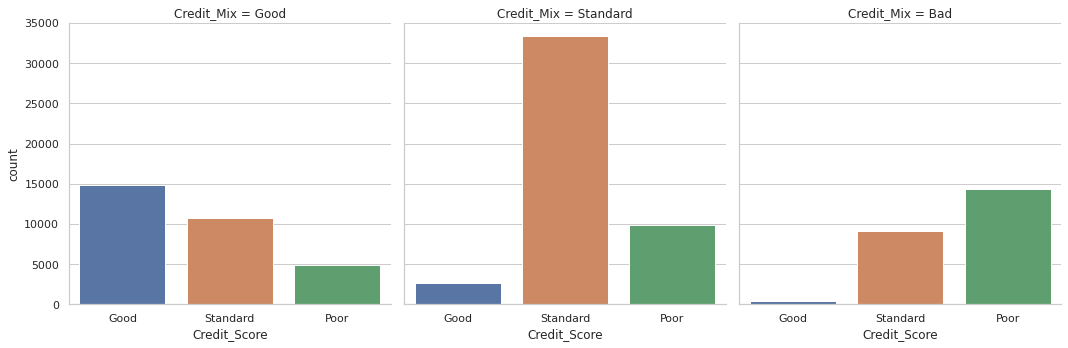

In [37]:
sns.catplot(x = 'Credit_Score', col = 'Credit_Mix', data = df, 
            kind = 'count', col_wrap = 3, legend = True)

In [38]:
typeOfLoansMAP = dict()
for element in df.Type_of_Loan:
    occ_vals = element.split(',')
    for val in occ_vals:
        val = val.strip(' ')
        if 'and' in val :
            val = val[4:]
        if val in typeOfLoansMAP : 
            typeOfLoansMAP[val] += 1
        else:
            typeOfLoansMAP[val] = 1
typeOfLoansMAP

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'No Data': 11408,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

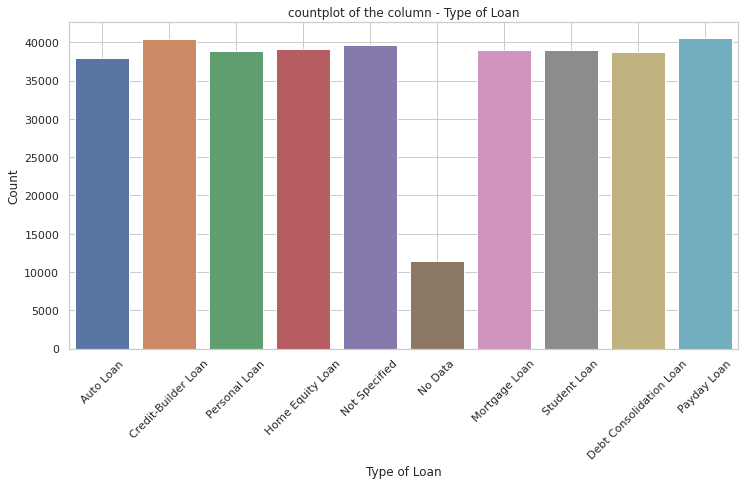

In [39]:
plt.figure(figsize = (12,6))
sns.barplot(x = list(typeOfLoansMAP.keys()), y = list(typeOfLoansMAP.values()))
plt.title('countplot of the column - Type of Loan')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Type of Loan', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(True)

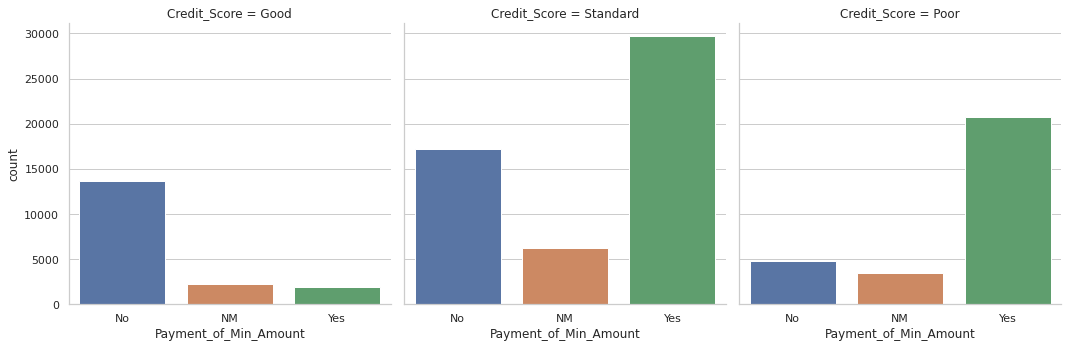

In [40]:
sns.catplot(x = 'Payment_of_Min_Amount', col = 'Credit_Score', 
               data = df, kind = 'count', col_wrap = 3)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Age Distribution')

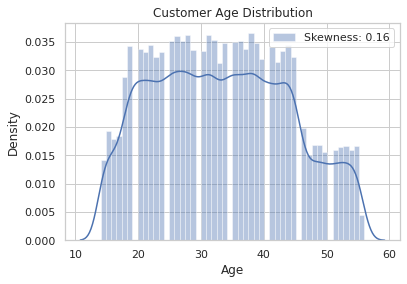

In [41]:
### Understanding the distribution of the column - Age

sns.distplot(df['Age'], label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

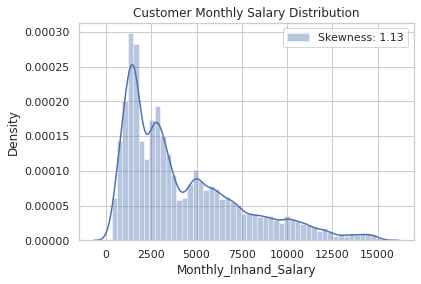

In [42]:
### Understanding the distribution of the column - Monthly_Inhand_Salary

sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

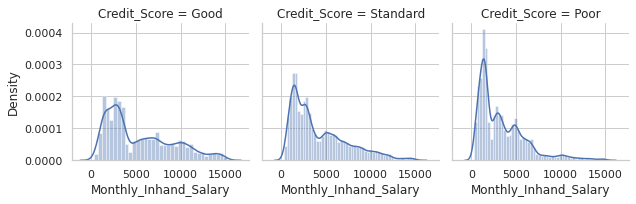

In [43]:
### Monthly Inhand Salary distribution by Credit Score
sns.FacetGrid(df, col = 'Credit_Score').map(sns.distplot, 'Monthly_Inhand_Salary')

<AxesSubplot:>

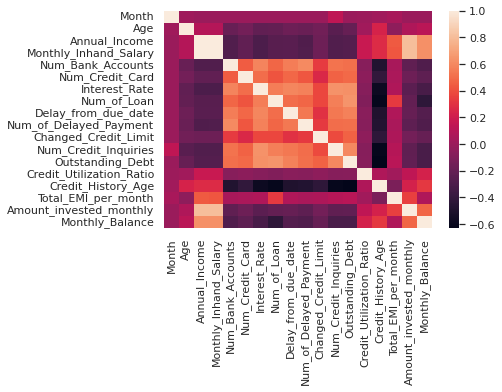

In [44]:
sns.heatmap(df.corr())

<AxesSubplot:>

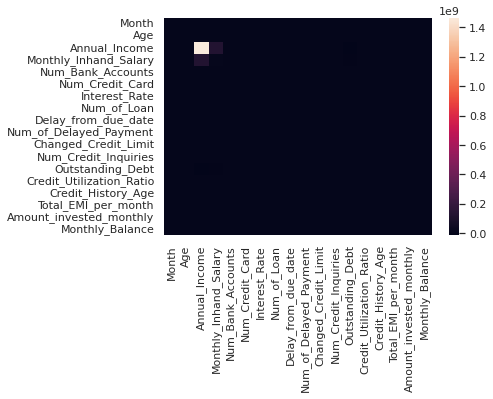

In [45]:
sns.heatmap(df.cov())

([<matplotlib.patches.Wedge at 0x7f209da1c250>,
 [Text(-1.3134431097038695, -0.13140470909152852, 'Standard'),
  Text(1.1825730108727892, -0.586447844190143, 'Poor'),
  Text(0.7012587444132302, 1.1183184579465637, 'Good')],
 [Text(-0.7164235143839288, -0.07167529586810646, '53.17%'),
  Text(0.6450398241124304, -0.3198806422855325, '29.00%'),
  Text(0.38250476967994373, 0.6099918861526711, '17.83%')])

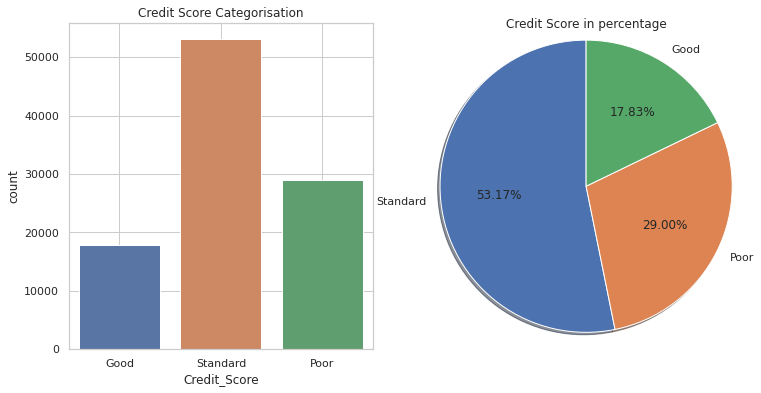

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Credit Score Categorisation')
sns.countplot(x='Credit_Score', data=df)
plt.grid(True)
plt.subplot(1,2,2)
plt.title('Credit Score in percentage')
plt.pie(data = df, x = df.Credit_Score.value_counts().values, 
        labels = df.Credit_Score.value_counts().index,
        startangle = 90,
        autopct='%1.2f%%', 
        shadow=True,  radius = 1.2)

<Figure size 864x432 with 0 Axes>

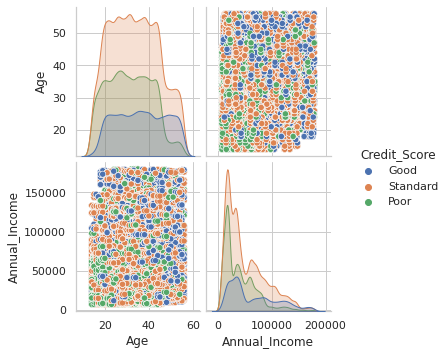

In [47]:
temp_df = pd.DataFrame(df[['Age', 'Annual_Income', 'Credit_Score']])
plt.figure(figsize = (12,6))
sns.pairplot(temp_df, hue = "Credit_Score")

<AxesSubplot:xlabel='Age', ylabel='Occupation'>

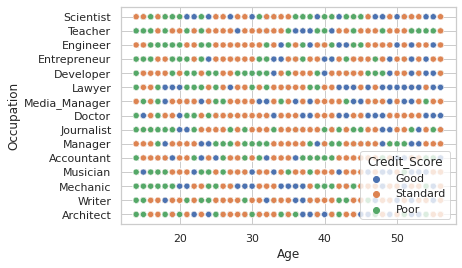

In [48]:
sns.scatterplot(x="Age",
                    y="Occupation", hue="Credit_Score",
                    data=df)

In [49]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Count'>

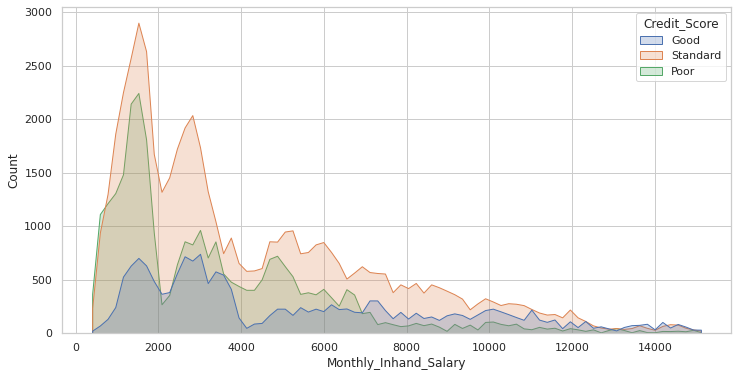

In [50]:
plt.figure(figsize = (12,6))
sns.histplot(df, x="Monthly_Inhand_Salary", hue="Credit_Score", element="poly")

<AxesSubplot:xlabel='Annual_Income', ylabel='Count'>

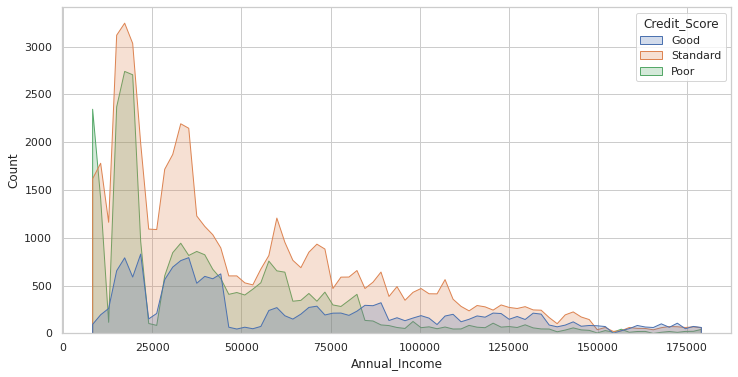

In [51]:
plt.figure(figsize = (12,6))
sns.histplot(df, x="Annual_Income", hue="Credit_Score", element="poly")

<AxesSubplot:xlabel='Annual_Income', ylabel='Occupation'>

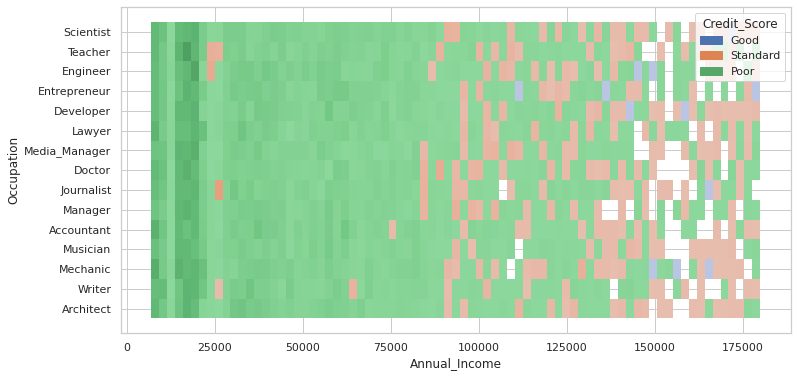

In [215]:
plt.figure(figsize = (12,6))
sns.histplot(df, y="Occupation", x="Annual_Income", hue="Credit_Score")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


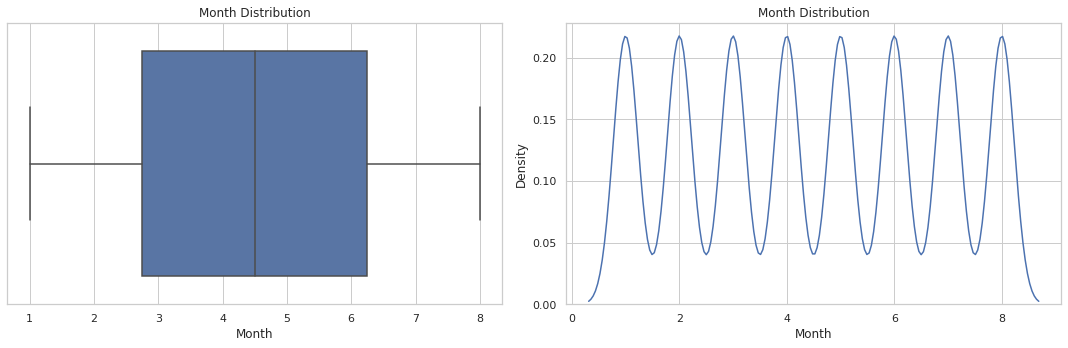

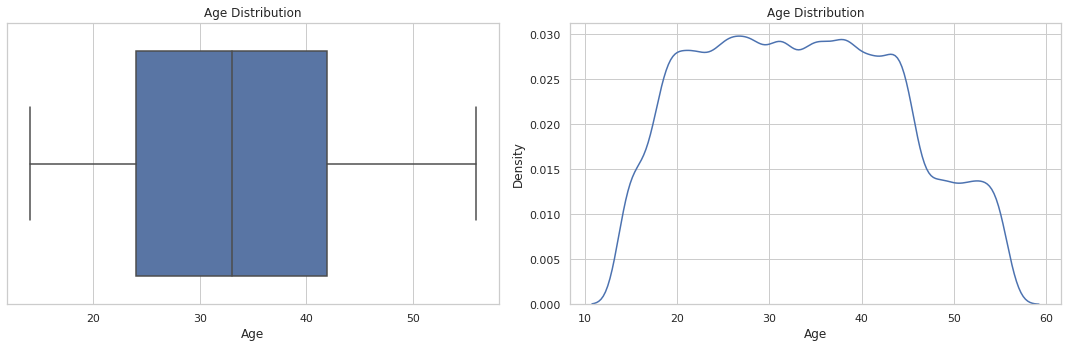

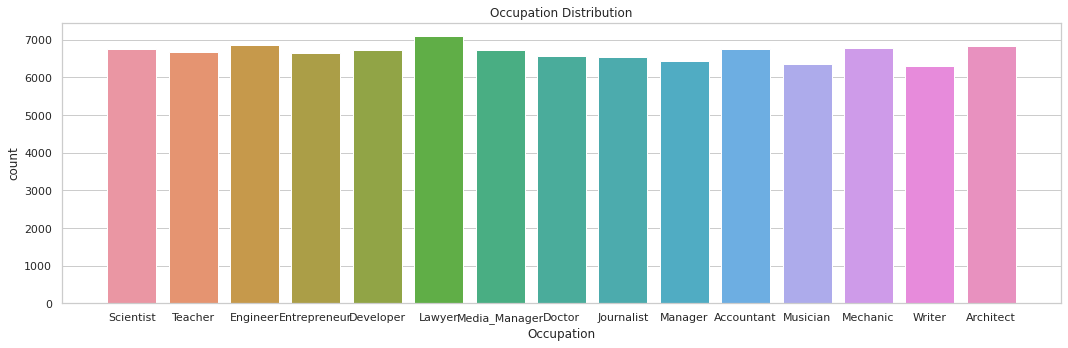

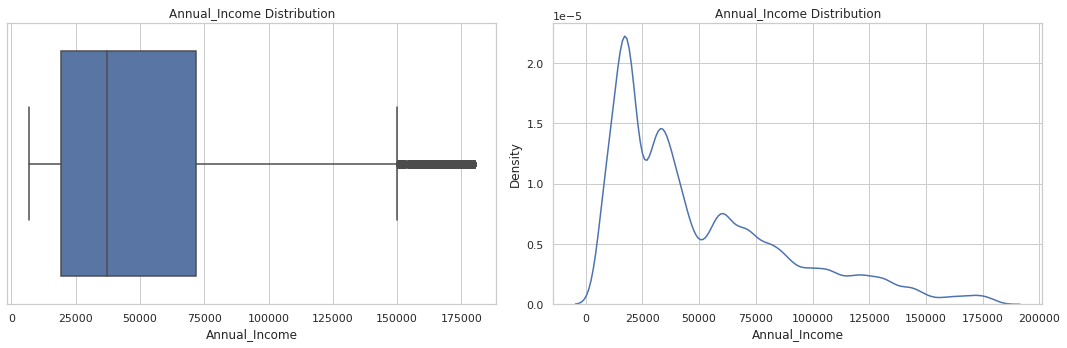

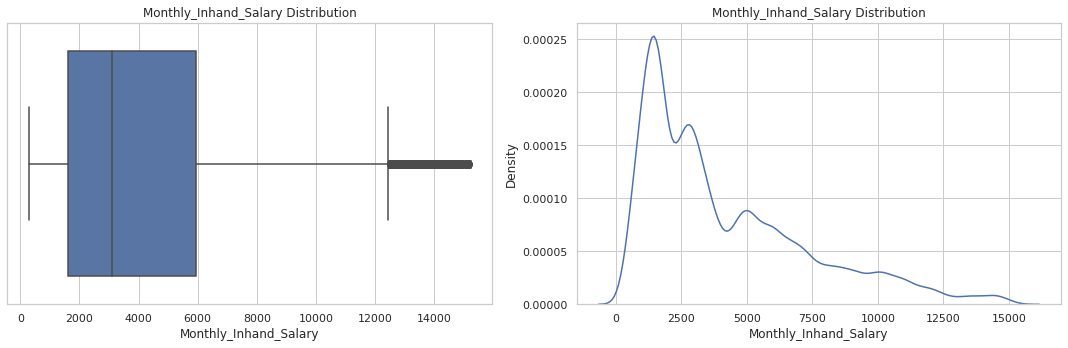

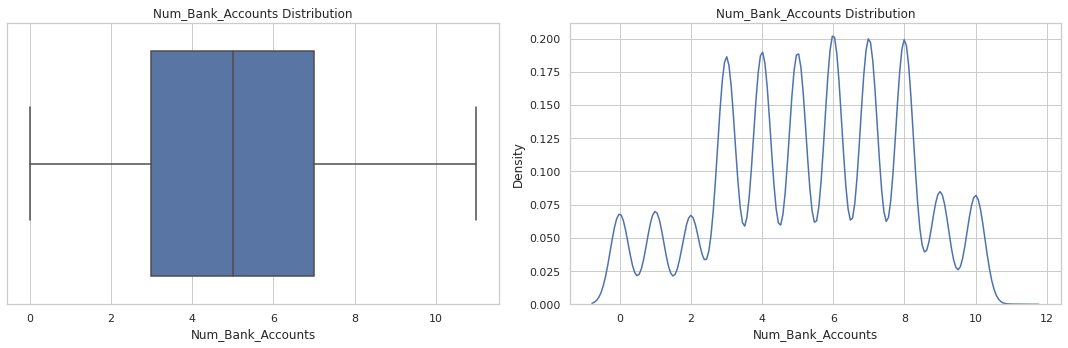

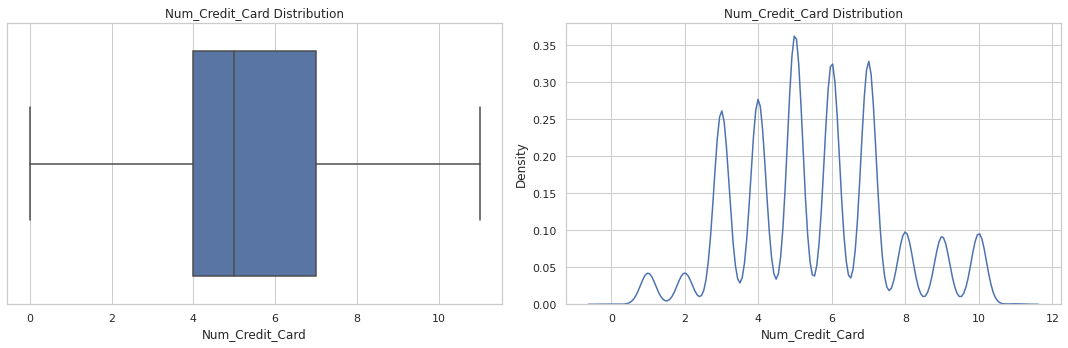

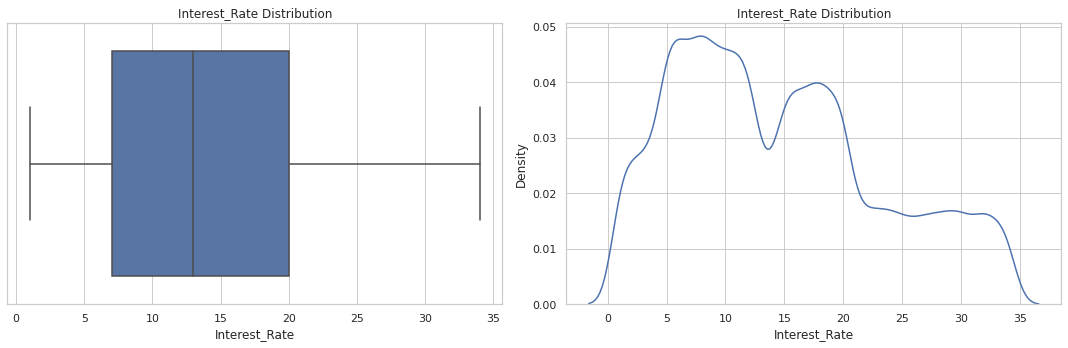

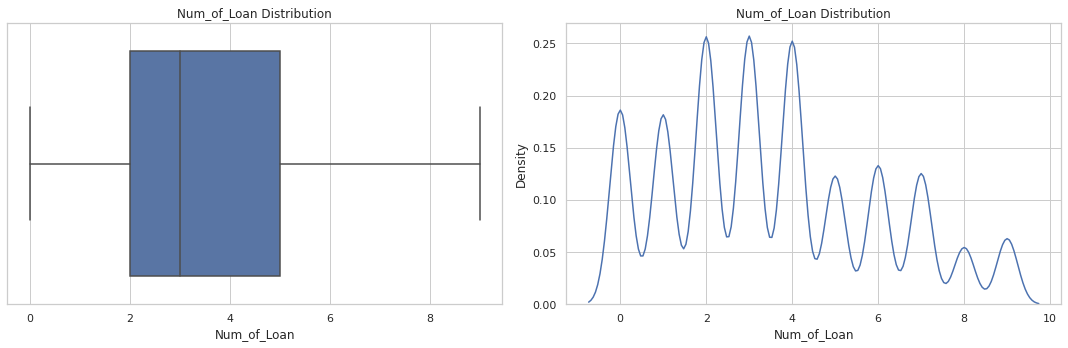

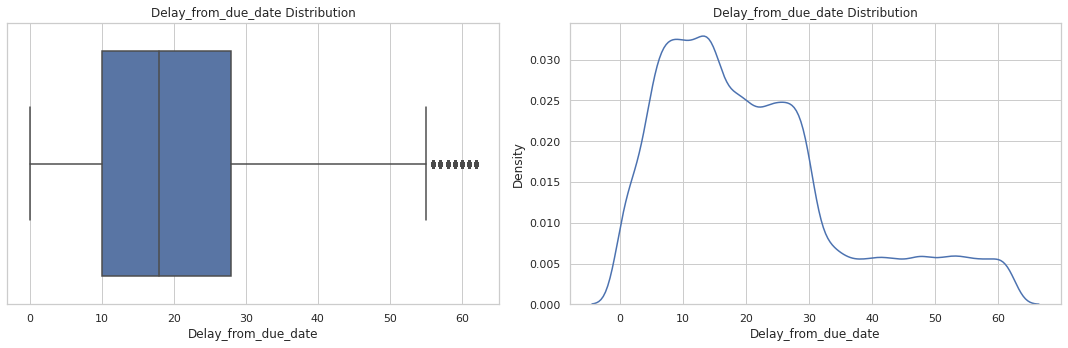

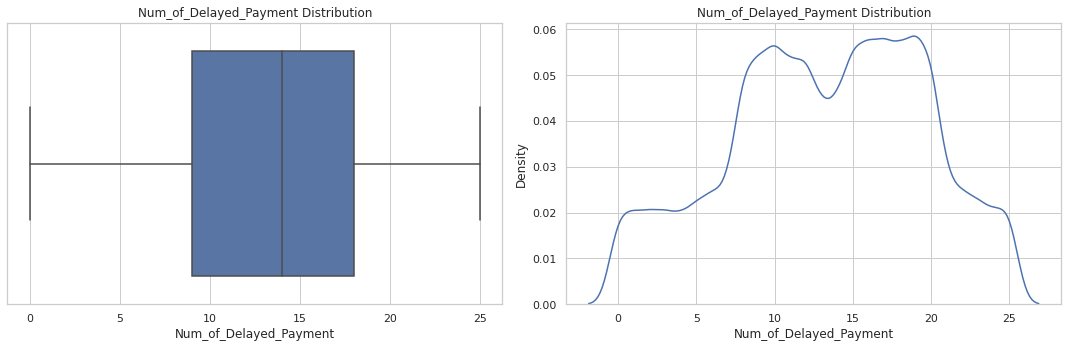

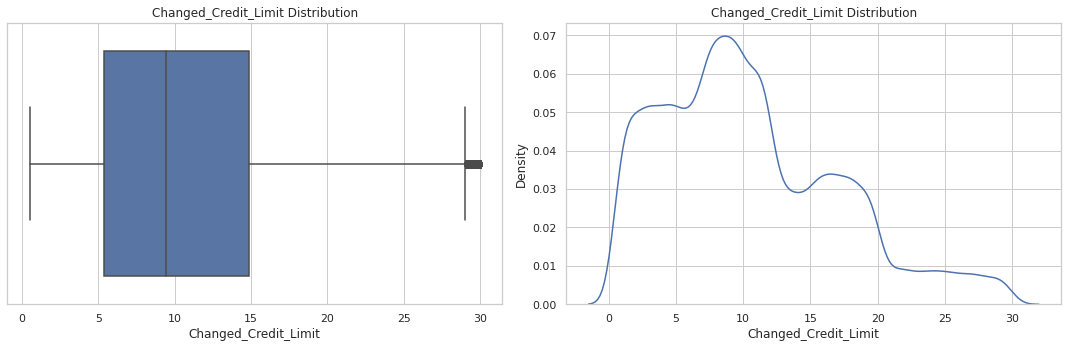

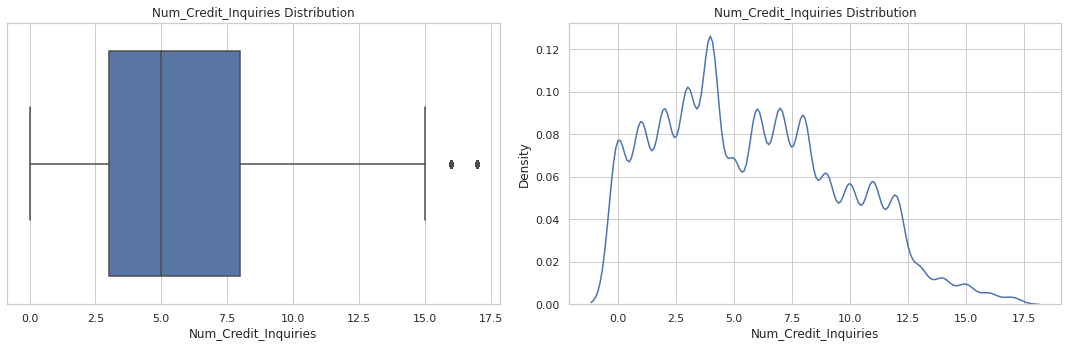

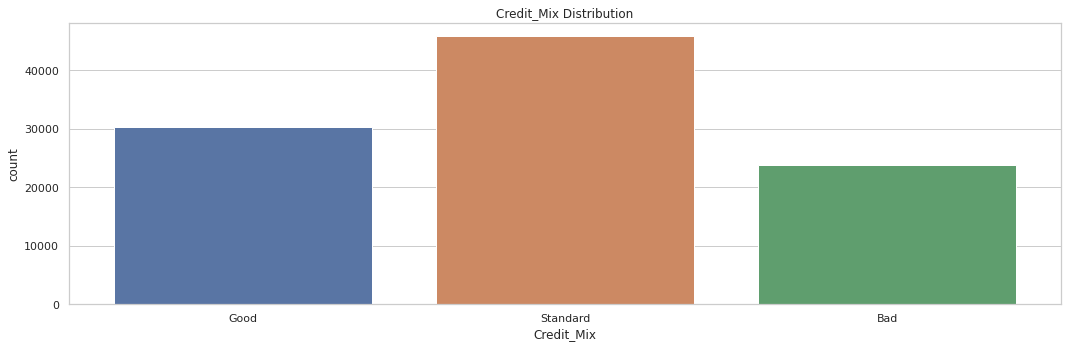

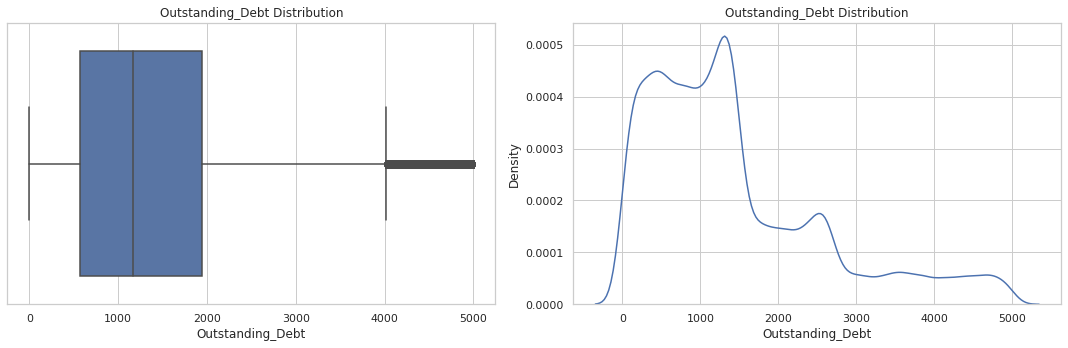

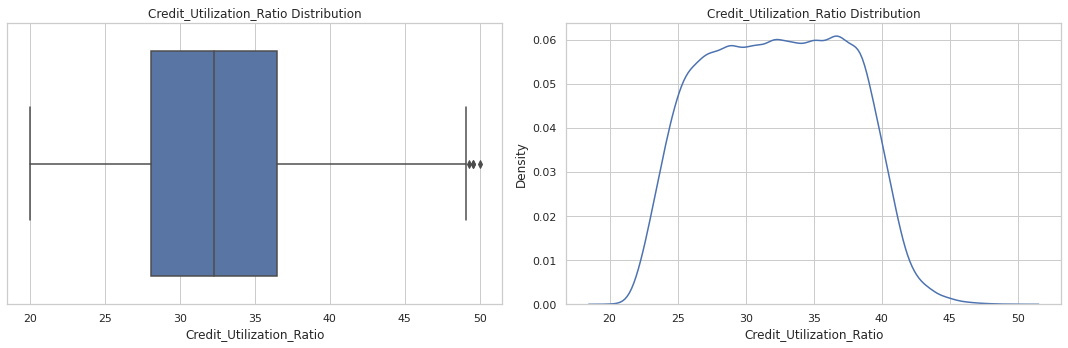

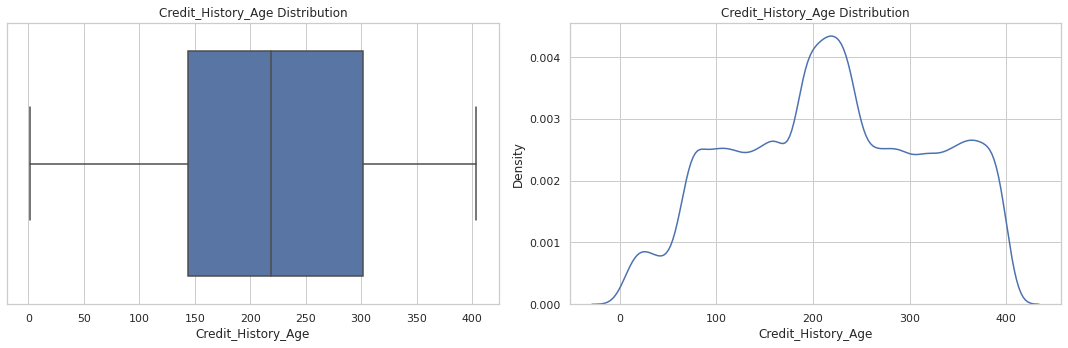

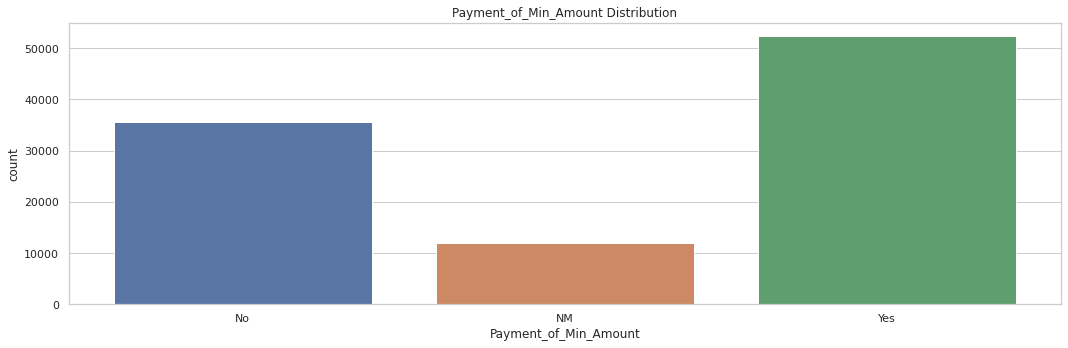

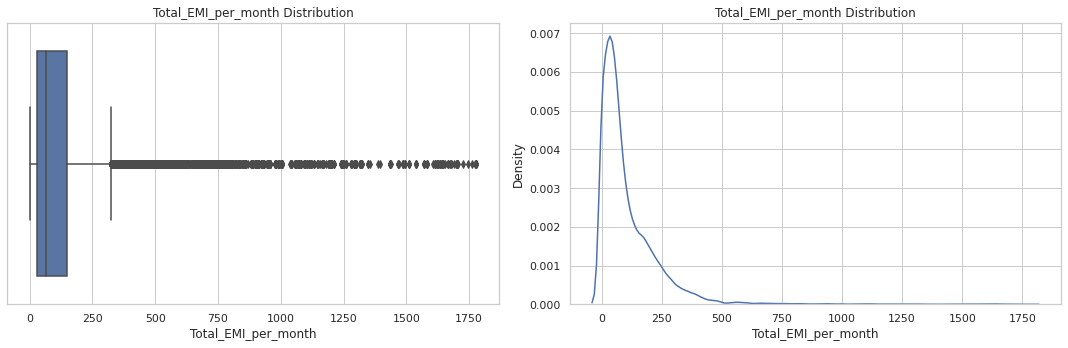

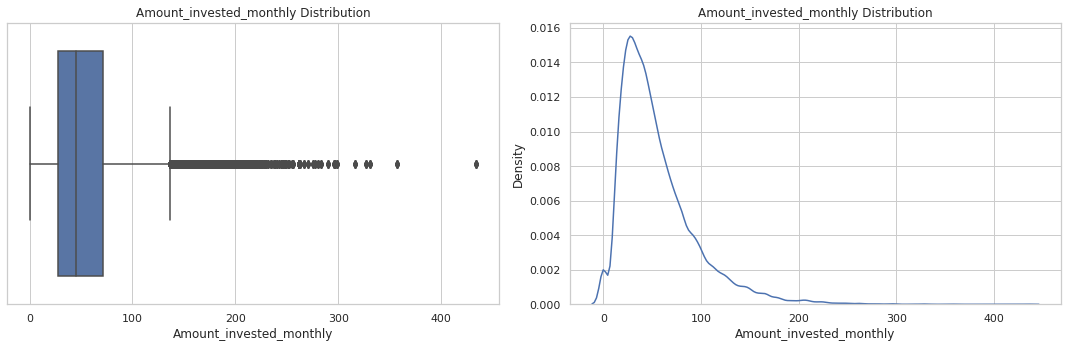

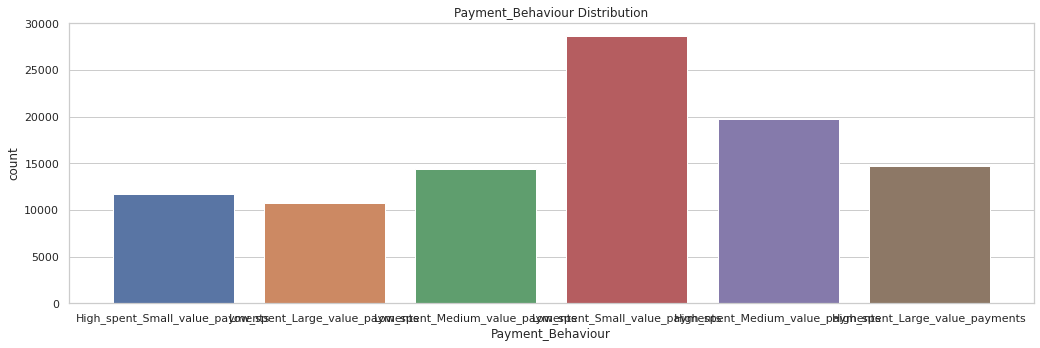

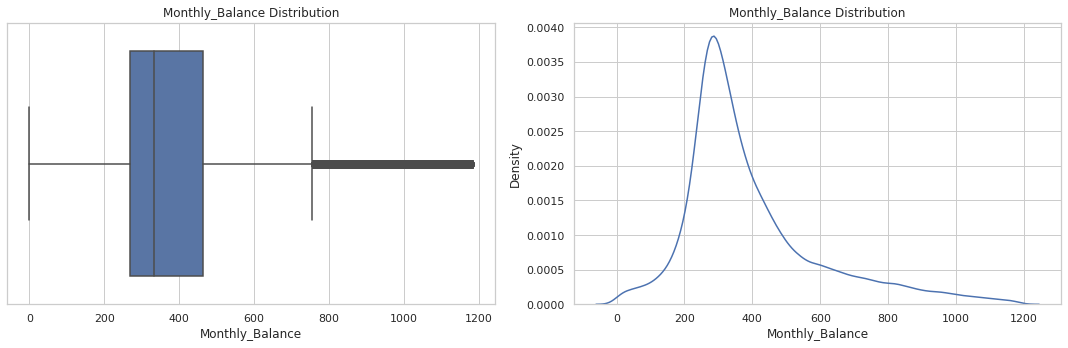

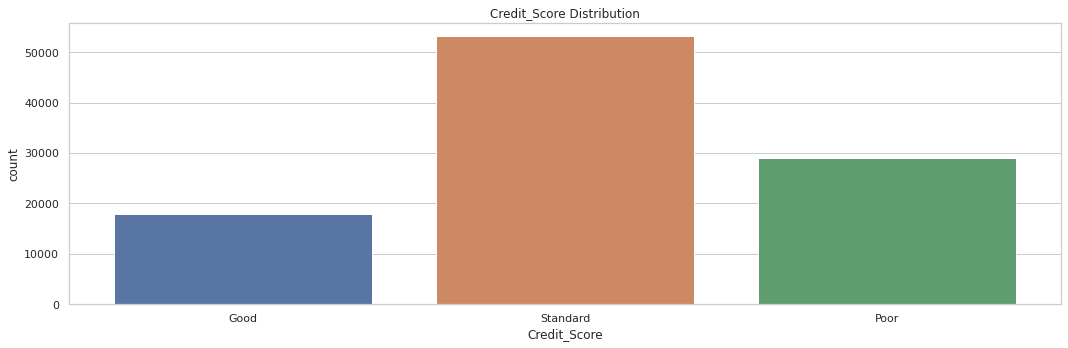

In [216]:
def make_Distribution_graph_of_cols(column, data, category, title = 'Distribution'):
    sns.set(style='whitegrid')
    font_dict = {'fontsize': 14}
    if category == 'object':
        fig, ax = plt.subplots(1,1, figsize = (15,5))
        ax = np.ravel(ax)
        sns.countplot(x = data[column] ,ax = ax[0]).set_title(title)
        ax = np.reshape(ax, (1, 1))
        plt.tight_layout()
    else:
        fig, ax = plt.subplots(1,2, figsize = (15,5))
        ax = np.ravel(ax)
        sns.boxplot(data=data,x=column ,ax = ax[0]).set_title(title)
        sns.kdeplot(data=data,x=column ,ax = ax[1]).set_title(title)
        ax = np.reshape(ax, (1, 2))
        plt.tight_layout()
    plt.plot()

def plot_all_cols(data):
    for cols in data.columns:
        if cols != 'Type_of_Loan' : 
            make_Distribution_graph_of_cols(cols, df, 
                                            category = str(df[cols].dtype), 
                                            title = cols + ' Distribution')

plot_all_cols(df)

In [217]:
for col in df.columns:
    print(col,' ',df[col].nunique())

Month   8
Age   43
Occupation   15
Annual_Income   12488
Monthly_Inhand_Salary   13241
Num_Bank_Accounts   12
Num_Credit_Card   12
Interest_Rate   34
Num_of_Loan   10
Type_of_Loan   6261
Delay_from_due_date   63
Num_of_Delayed_Payment   26
Changed_Credit_Limit   3452
Num_Credit_Inquiries   18
Credit_Mix   3
Outstanding_Debt   12203
Credit_Utilization_Ratio   100000
Credit_History_Age   404
Payment_of_Min_Amount   3
Total_EMI_per_month   11890
Amount_invested_monthly   12261
Payment_Behaviour   6
Monthly_Balance   98494
Credit_Score   3


In [218]:
clean_df = df.copy()

In [219]:
clean_df.Credit_Score = clean_df.Credit_Score.map({'Poor':1, 'Standard':2, 'Good':3})

In [220]:
y_df = clean_df['Credit_Score']
x_df = clean_df.drop(columns=['Credit_Score'])

In [221]:
categorical_cols = [col for col in x_df.columns if x_df[col].dtype == 'object']
categorical_cols

['Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [237]:
len(df['Type_of_Loan'].unique())

6261

In [238]:
typeOfLoansMAP

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'No Data': 11408,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

In [222]:
categorical_encoder = OrdinalEncoder()
categorical_df = pd.DataFrame(categorical_encoder.fit_transform(x_df[categorical_cols]), 
                     index = x_df[categorical_cols].index, 
                     columns = x_df[categorical_cols].columns)
categorical_df

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,12.0,128.0,1.0,1.0,2.0
1,12.0,128.0,1.0,1.0,3.0
2,12.0,128.0,1.0,1.0,4.0
3,12.0,128.0,1.0,1.0,5.0
4,12.0,128.0,1.0,1.0,1.0
...,...,...,...,...,...
99995,9.0,683.0,1.0,1.0,0.0
99996,9.0,683.0,1.0,1.0,1.0
99997,9.0,683.0,1.0,1.0,0.0
99998,9.0,683.0,1.0,1.0,3.0


In [223]:
categorical_df.Payment_of_Min_Amount.unique()

array([1., 0., 2.])

In [224]:
x_df.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [225]:
for col in categorical_cols:
    x_df[col] = categorical_df[col].copy()

In [226]:
x_df.Payment_of_Min_Amount.unique()

array([1., 0., 2.])

In [227]:
x_df.shape, y_df.shape

((100000, 23), (100000,))

In [228]:
scaled_columns = ['Annual_Income', 'Monthly_Inhand_Salary',
    #    'Interest_Rate','Delay_from_due_date', 
       'Changed_Credit_Limit',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly','Monthly_Balance']

In [229]:
print(len(x_df.columns))
for col in x_df.columns:
    print(col)
    print(x_df[col].unique())

23
Month
[1 2 3 4 5 6 7 8]
Age
[23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]
Occupation
[12. 13.  4.  5.  2.  7. 10.  3.  6.  8.  0. 11.  9. 14.  1.]
Annual_Income
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
Monthly_Inhand_Salary
[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]
Num_Bank_Accounts
[ 3.  2.  1.  7.  4.  0.  8.  5.  6.  9. 10. 11.]
Num_Credit_Card
[ 4.  5.  1.  7.  6.  8.  3.  9.  2. 10. 11.  0.]
Interest_Rate
[ 3.  6.  8.  4.  5. 15.  7. 12. 20.  1. 14. 32. 16. 17. 10. 31. 25. 18.
 19.  9. 24. 13. 33. 11. 21. 29. 28. 30. 23. 34.  2. 27. 26. 22.]
Num_of_Loan
[4. 1. 3. 0. 2. 7. 5. 6. 8. 9.]
Type_of_Loan
[ 128.  684.   63. ... 2103. 4832. 4914.]
Delay_from_due_date
[ 3.  5.  6.  8.  7. 13. 10.  0.  4.  9.  1. 12. 11. 30. 31. 34. 27. 14.
  2. 16. 17. 15. 23. 22. 21. 18. 19. 52. 5

In [230]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 0)

In [231]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [232]:
# k_array = np.arange(1,31,1)
# k_array=[2]
# MSE = []
# train_accuracy_score = []
# train_score = []
# test_accuracy_score = []
# test_score = []
# for k in k_array:
#     knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
#     knn_classifier.fit(x_train, y_train)
#     y_train_pred = knn_classifier.predict(x_train)
#     y_test_pred = knn_classifier.predict(x_test)
#     train_accuracy_score.append(accuracy_score(y_train, y_train_pred))
#     train_score.append(knn_classifier.score(x_train,y_train))
#     test_accuracy_score.append(accuracy_score(y_test, y_test_pred))
#     test_score.append(knn_classifier.score(x_test,y_test))

In [244]:
knn_classifier = KNeighborsClassifier(n_jobs=-1)
parameters = {
    'n_neighbors': range(1, 31, 1),
    'weights' : ['uniform'],
    'p' : [2],
    'metric' : ['minkowski'],
}
model = GridSearchCV(knn_classifier, 
                     param_grid = parameters,
                     cv = 3,
                     n_jobs = 1,
                     scoring = 'accuracy', 
                     verbose = 10)

model.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START metric=minkowski, n_neighbors=1, p=2, weights=uniform......
[CV 1/3; 1/30] END metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.734 total time=  26.9s
[CV 2/3; 1/30] START metric=minkowski, n_neighbors=1, p=2, weights=uniform......
[CV 2/3; 1/30] END metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.734 total time=  26.9s
[CV 3/3; 1/30] START metric=minkowski, n_neighbors=1, p=2, weights=uniform......
[CV 3/3; 1/30] END metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.731 total time=  27.0s
[CV 1/3; 2/30] START metric=minkowski, n_neighbors=2, p=2, weights=uniform......
[CV 1/3; 2/30] END metric=minkowski, n_neighbors=2, p=2, weights=uniform;, score=0.707 total time=  28.8s
[CV 2/3; 2/30] START metric=minkowski, n_neighbors=2, p=2, weights=uniform......
[CV 2/3; 2/30] END metric=minkowski, n_neighbors=2, p=2, weights=uniform;, score=0.712 total time=  29.1s
[CV 

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'metric': ['minkowski'], 'n_neighbors': range(1, 31),
                         'p': [2], 'weights': ['uniform']},
             scoring='accuracy', verbose=10)

In [245]:
model.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

In [246]:
model.best_score_

0.7331749785100986

In [248]:
import pickle
filename = 'knn_CVgrid_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7614


In [249]:
loaded_model.score(x_train, y_train)

1.0

In [252]:
df['Credit_Score'], y_df
## mapping is like, good = 3, poor = 1, standard = 2

(0            Good
 1            Good
 2            Good
 3            Good
 4            Good
            ...   
 99995        Poor
 99996        Poor
 99997        Poor
 99998    Standard
 99999        Poor
 Name: Credit_Score, Length: 100000, dtype: object,
 0        3
 1        3
 2        3
 3        3
 4        3
         ..
 99995    1
 99996    1
 99997    1
 99998    2
 99999    1
 Name: Credit_Score, Length: 100000, dtype: int64)

In [268]:
accuracy_of_models = dict()

def evaluate_classification(model, model_name, x_train, x_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(x_train))
    test_accuracy = accuracy_score(y_test, model.predict(x_test))
    accuracy_of_models[str(model_name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(model_name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(model_name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])
    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)
    print(classification_report(y_test, predicted))

Training Accuracy KNN 100.0  Test Accuracy KNN 76.14
              precision    recall  f1-score   support

           1       0.75      0.76      0.75      5826
           2       0.79      0.79      0.79     10585
           3       0.70      0.70      0.70      3589

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.76      0.76     20000



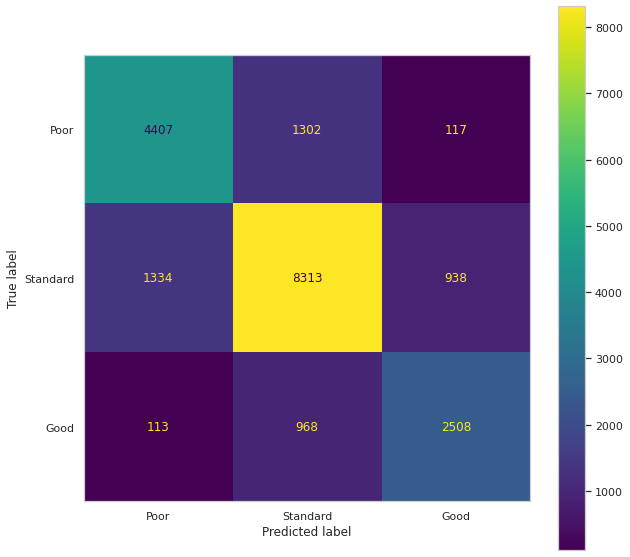

In [269]:
evaluate_classification(model, 'KNN', x_train, x_test, y_train, y_test)

In [276]:
model = LogisticRegression(C=100,multi_class='ovr', solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(C=100, multi_class='ovr', solver='liblinear')

In [277]:
model.score(x_train, y_train)

0.6414125

In [278]:
model.score(x_test, y_test)

0.6405

In [279]:
import pickle
filename = 'logistic_regression_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.6405


Training Accuracy Logistic_Regression 64.14125  Test Accuracy Logistic_Regression 64.05
              precision    recall  f1-score   support

           1       0.66      0.51      0.58      5826
           2       0.66      0.75      0.70     10585
           3       0.56      0.53      0.55      3589

    accuracy                           0.64     20000
   macro avg       0.62      0.60      0.61     20000
weighted avg       0.64      0.64      0.64     20000



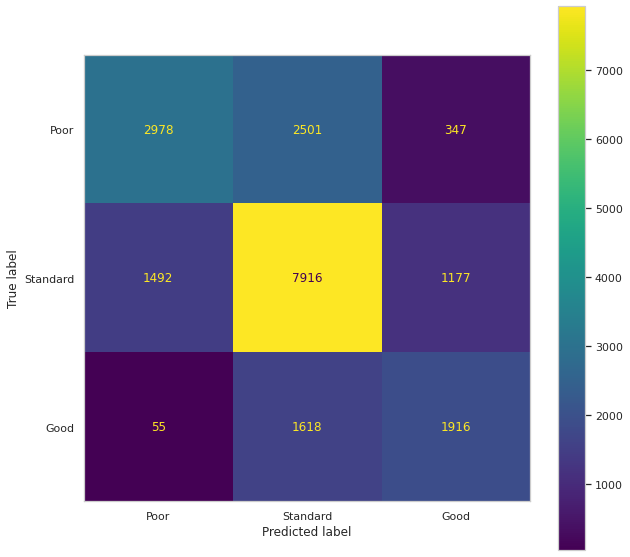

In [280]:
evaluate_classification(model, 'Logistic_Regression', x_train, x_test, y_train, y_test)

In [292]:
lr_model = pickle.load(open('./logistic_regression_model.sav', 'rb'))
knn_model = pickle.load(open('./knn_CVgrid_model.sav', 'rb'))

In [337]:
b1, b2, b3 = lr_model.intercept_ #biases
w1, w2, w3 = lr_model.coef_        #weights

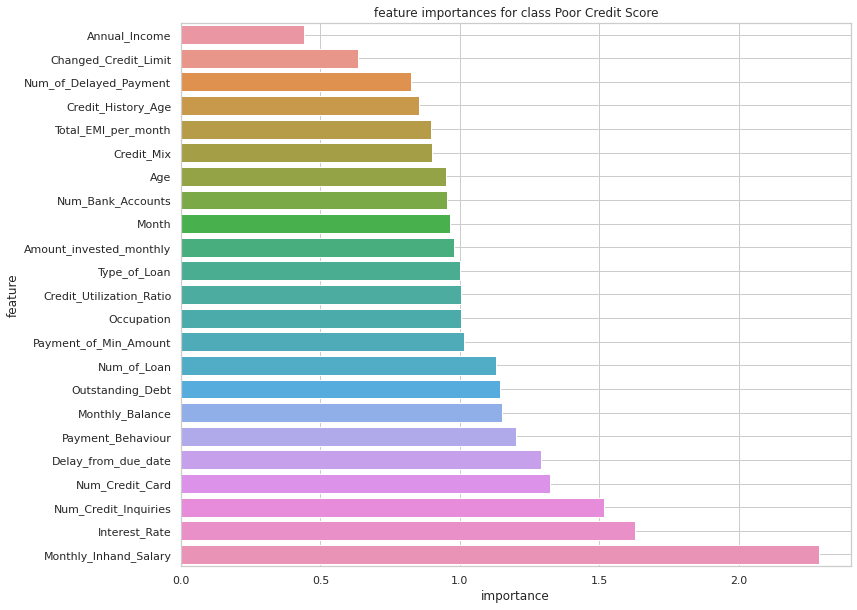

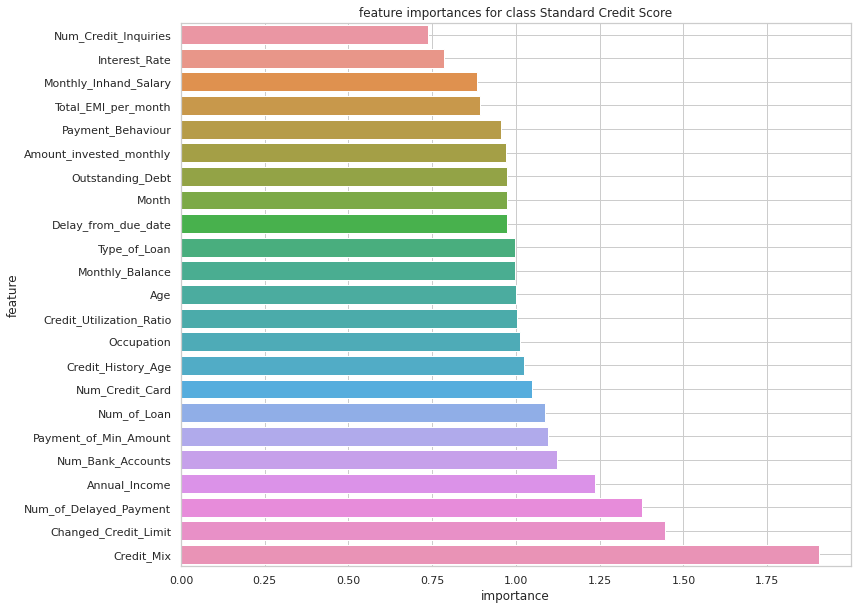

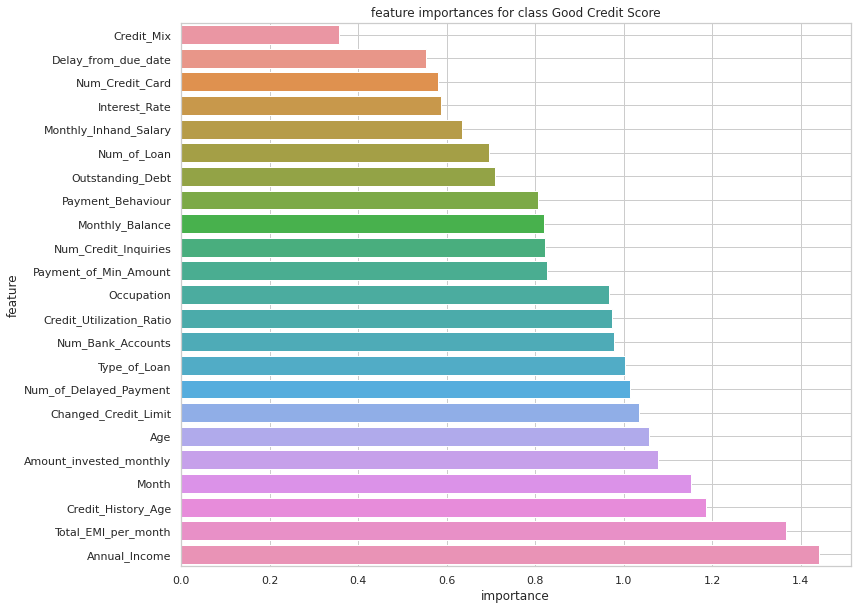

In [341]:
def plot_importances(data, classname, feature_names = x_df.columns) :
    plt.figure(figsize=(12,10))
    feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
    feature_importance["importance"] = np.exp(data)
    feature_importance = feature_importance.sort_values(by = ["importance"])
    plt.title(f"feature importances for class {classname} Credit Score")
    sns.barplot(data = feature_importance, y='feature', x='importance', orient='h')
    plt.grid(1)
    plt.show()
plot_importances(w1, 'Poor')
plot_importances(w2, 'Standard')
plot_importances(w3, 'Good')

In [342]:
df['Credit_Score'].unique(), y_df.unique()

(array(['Good', 'Standard', 'Poor'], dtype=object), array([3, 2, 1]))

In [53]:
df.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [54]:
df.Num_Credit_Inquiries.unique()

array([ 4.,  2.,  3.,  5.,  9.,  8.,  7.,  6.,  0.,  1., 10., 11., 12.,
       17., 13., 14., 16., 15.])